In [ ]:
!pip install squarify
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
sns.set(context = 'talk', style = 'darkgrid', palette = 'deep', font = 'sans-serif', font_scale = 1, color_codes = False, rc = None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/homework/Google/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df.isnull().mean()

App               0.000000
Category          0.000000
Rating            0.135965
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000092
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000738
Android Ver       0.000277
dtype: float64

In [ ]:
#Так как процент пропущенных значений небольшой, а в задачах, в первую очередь, стоит "провести EDA", то можно просто удалить строки с пропущенными значениями.
df.dropna(how ='any', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


Text(0.5, 1.0, 'Распределение рейтинга приложений')

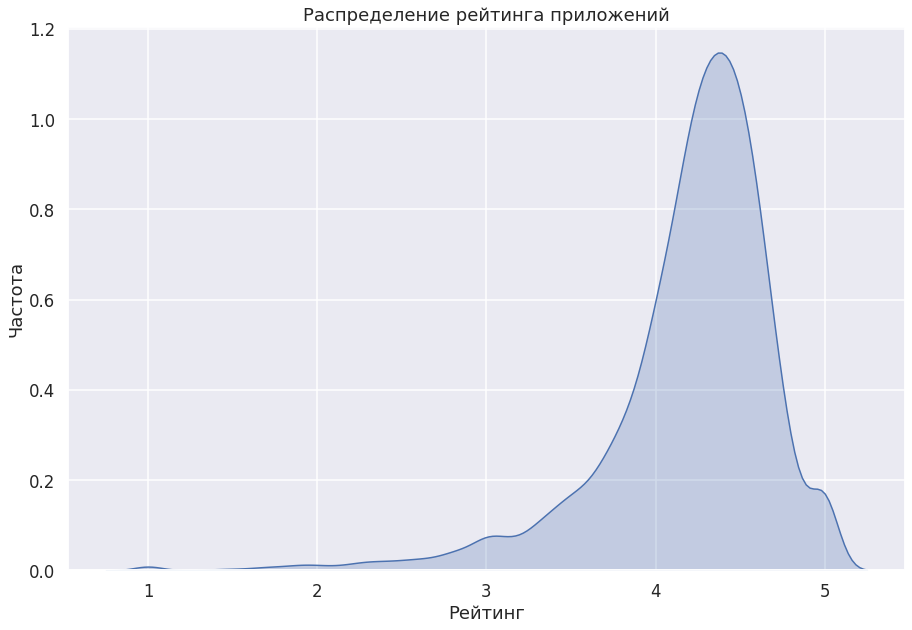

In [ ]:
sns.kdeplot(df.Rating, shade = True)
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.title('Распределение рейтинга приложений')

# Краткая теоритическая выжимка.
# Ядерные оценки плотности — KDE, Kernel Density Estimates — способ что-то понять о распределении, когда неизвестно ничего. 
# Такого рода методы называют непараметрическими, они иллюстрируют разницу подходов в статистике и теории вероятностей:
# если в теории вероятности известно распределение и исследуются его свойства, то в статистике зачастую известны только данные, и по их свойствам угадывается распределение.

In [ ]:
df.plot(kind='scatter', x = 'Content Rating' y = 'Reviews') 

In [ ]:
# Видно что хороших оценок (4 и 5) гораздо больше чем, низких (1, 2 и 3)

Text(0.5, 1.0, 'Количество приложений в каждой категории')

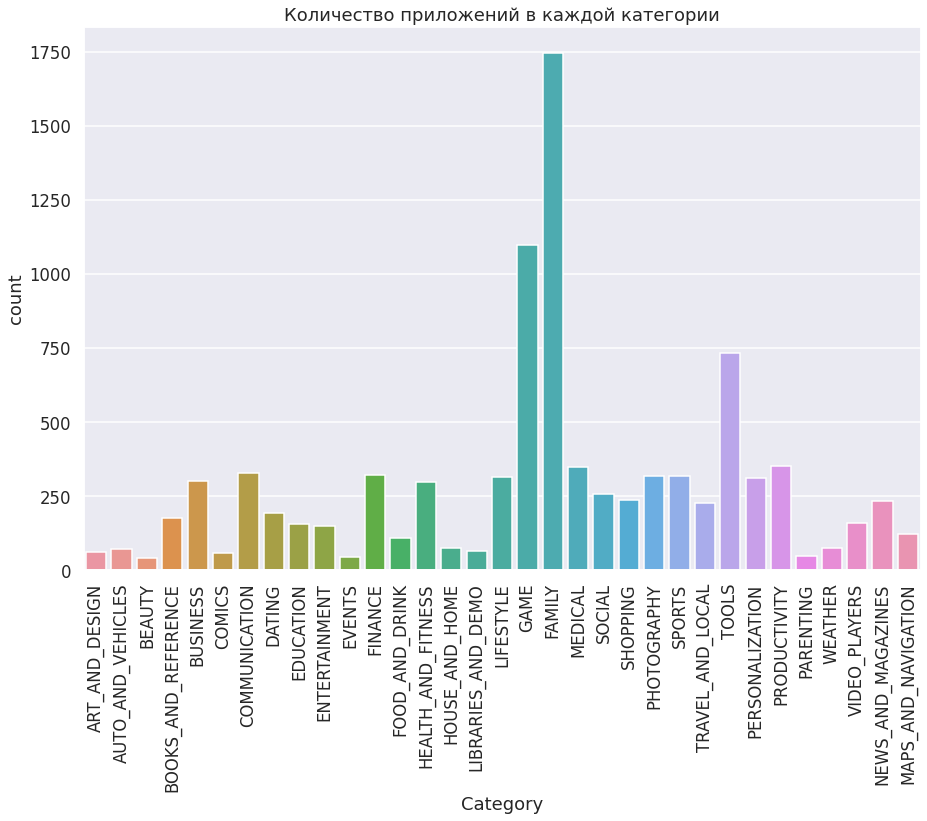

In [ ]:
sns.countplot(x = 'Category', data = df)
plt.xticks(rotation = 90)
plt.title('Количество приложений в каждой категории')

In [ ]:
# Категории «GAME» и «FAMILY» — самые популярные приложения в магазине.

Text(0.5, 1.0, 'Процент платных и бесплатных приложений')

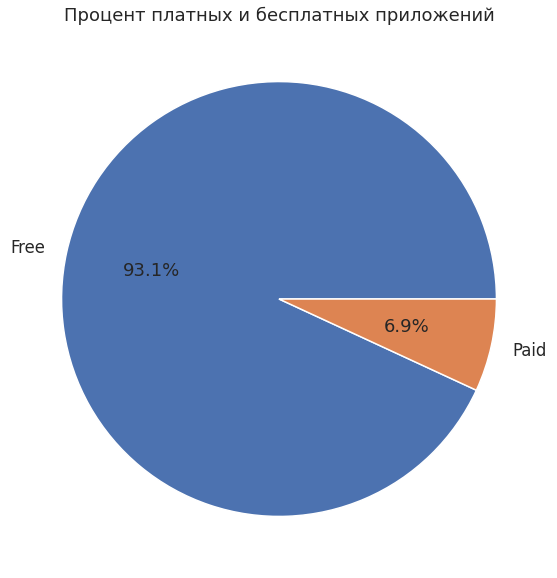

In [ ]:
plt.pie(df['Type'].value_counts(), labels = df['Type'].value_counts().index, autopct = '%1.1f%%')
plt.title('Процент платных и бесплатных приложений')

In [ ]:
# Платных приложений в Google Play гораздо меньше, чем бесплатных

Text(0.5, 1.0, 'Распределение оценки приложений по рейтингу зрелости')

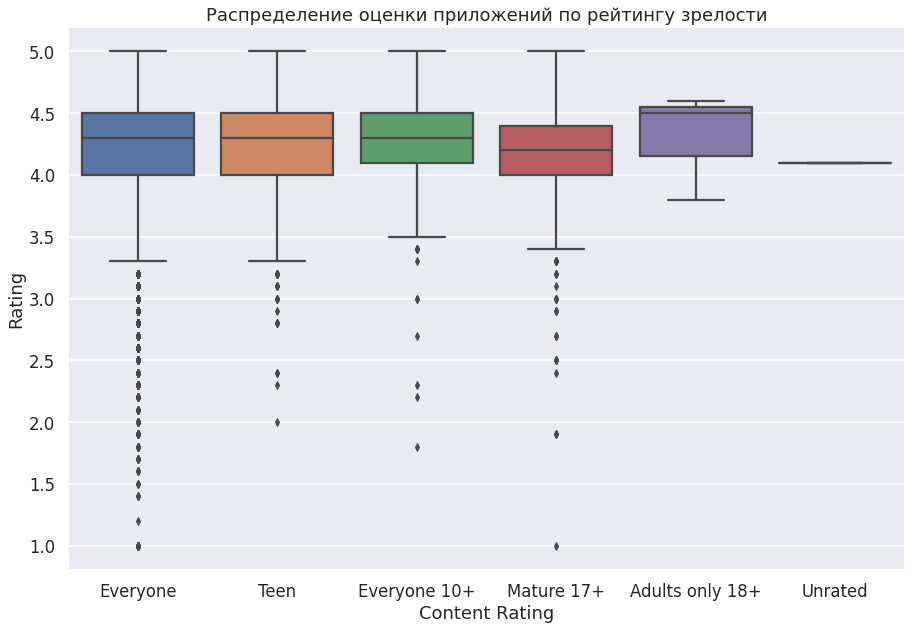

In [ ]:
sns.boxplot(x = 'Content Rating', y = 'Rating', data = df)
plt.title('Распределение оценки приложений по рейтингу зрелости')

In [ ]:
# Приложения для взрослых получают более низкий рейтинг, чем приложених из других категорий.